<a href="https://colab.research.google.com/github/MyselfMohammed/09.Deep_Learning/blob/main/YOLO_Based_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generic Functions

In [2]:
# To Unzip the Files

from zipfile import ZipFile
import os

# Path to the uploaded or existing zip file
zip_path = "/content/Household_Things.zip"  # Change this to your actual file path

# Destination folder to extract the zip
extract_to = "/content/Object_Detection"

# Create the destination folder if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Unzip the file
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Unzipping complete!")

✅ Unzipping complete!


In [ ]:
# To Delete Unwanted Zip Files

import os

zip_path = "/content/Household_Plastic_Dataset.zip"

if os.path.exists(zip_path):
    os.remove(zip_path)
    print("✅ Zip file deleted successfully.")
else:
    print("⚠️ File not found.")

In [5]:
# To Delete Unwanted Files
import shutil

folder_path = '/content/Object_Detection/Household_Things/Train_Set'

shutil.rmtree(folder_path)
print(f"Deleted folder: {folder_path}")

Deleted folder: /content/Object_Detection/Household_Things/Train_Set


#1. Gather and Label Training Images

Collect the Images from various available sources and through Live Instances to Enhance the rate of Detection more efficiently.

#2. Upload Image Dataset From Drive

In [1]:
# To Mount Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#3. Split Images into Train and Test Set as Validation Folders

In [6]:
# ✅ Train-Test Split Script with Image and Label File (For yolo method) with Count

import os
import shutil
import random

# Path to the folder containing both images and annotation files
source_dataset_dir = "/content/Object_Detection/Household_Things"

# Destination folders for train and test datasets
train_output_dir = "/content/Object_Detection/Train_Set"
test_output_dir = "/content/Object_Detection/Test_Set"

# Ratio of images to use for training
train_split_ratio = 0.8

# List of all image filenames in the source directory
all_image_files = [file_name for file_name in os.listdir(source_dataset_dir)
                   if file_name.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Shuffle image list randomly to ensure unbiased split
random.shuffle(all_image_files)

# Calculate split index and divide images
split_point = int(len(all_image_files) * train_split_ratio)
train_image_files = all_image_files[:split_point]
test_image_files = all_image_files[split_point:]

# Create output directories if they don't already exist
os.makedirs(train_output_dir, exist_ok=True)
os.makedirs(test_output_dir, exist_ok=True)

# Counters for .txt files
train_label_count = 0
test_label_count = 0

# Function to copy image and corresponding label file (if exists)
def copy_image_and_label(image_filename, destination_dir):
    global train_label_count, test_label_count

    image_path_src = os.path.join(source_dataset_dir, image_filename)
    image_path_dst = os.path.join(destination_dir, image_filename)
    shutil.copy2(image_path_src, image_path_dst)

    # Look for corresponding label file (same name, .txt extension)
    label_filename = os.path.splitext(image_filename)[0] + ".txt"
    label_path_src = os.path.join(source_dataset_dir, label_filename)
    label_path_dst = os.path.join(destination_dir, label_filename)

    if os.path.exists(label_path_src):
        shutil.copy2(label_path_src, label_path_dst)
        if destination_dir == train_output_dir:
            train_label_count += 1
        else:
            test_label_count += 1

# Copy training images and labels
for train_img in train_image_files:
    copy_image_and_label(train_img, train_output_dir)

# Copy test images and labels
for test_img in test_image_files:
    copy_image_and_label(test_img, test_output_dir)

# Summary
print(f"✅ Dataset split completed successfully!\n")
print(f"🔹 Training set: {len(train_image_files)} images, {train_label_count} label files")
print(f"🔹 Testing set:  {len(test_image_files)} images, {test_label_count} label files")

✅ Dataset split completed successfully!

🔹 Training set: 313 images, 313 label files
🔹 Testing set:  79 images, 79 label files


# 4.Install Requirements (Ultralytics)

We'll install the Ultralytics library in this Google Colab instance. This Python library will be used to train the YOLO model.

In [11]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

#4. Configuration of Training Model

In [7]:
# Python function to automatically create data.yaml config file
# 1. Reads "classes.txt" file to get list of class names
# 2. Creates data dictionary with correct paths to folders, number of classes, and names of classes
# 3. Ensures output directory exists and writes data in YAML format to data.yaml

import os
import yaml  # PyYAML library

def create_data_yaml(path_classes_txt, path_yaml_output, path_train_set, path_validated_images):
    # Read class names
    if not os.path.exists(path_classes_txt):
        print(f"❌ '{path_classes_txt}' not found.")
        return

    with open(path_classes_txt, 'r') as readFile:
        class_names = [line.strip() for line in readFile if line.strip()]  # Skip empty/blank lines

    data_yaml = {
        'train': path_train_set,
        'val': path_validated_images,
        'nc': len(class_names),
        'names': class_names
    }

    # Ensure the output directory exists
    os.makedirs(os.path.dirname(path_yaml_output), exist_ok=True) #If the folder already exists, it proceeds else It Creates.

    # Save the data.yaml file
    with open(path_yaml_output, 'w') as writefile:
        yaml.dump(data_yaml, writefile, default_flow_style=False)

    print(f"✅ data.yaml created at: {path_yaml_output}")

In [8]:
# Define path to classes.txt and run function

path_classes_txt = '/content/Object_Detection/Household_Things/classes.txt'
path_yaml_output = '/content/Object_Detection/Configurations/data.yaml'
path_train_set = '/content/Object_Detection/Train_Set'
path_validated_images = '/content/Object_Detection/Test_Set'

create_data_yaml(path_classes_txt, path_yaml_output, path_train_set, path_validated_images)

✅ data.yaml created at: /content/Object_Detection/Configurations/data.yaml


#5. Train the Model Through YOLO

In [2]:
# Provide the yolo command to train a YOLOv8 object detection model
!yolo detect train data=/content/Object_Detection/Configurations/data.yaml model=yolov8n.pt epochs=100 imgsz=640 batch=16 workers=4\
patience=100 optimizer=SGD name=train_plastic_yolov8n verbose=True device='cpu' #<- Change This to GPU While Before Run in GPU

# Flag	Description :
# imgsz=640	-> Increased image size for better detail.
# epochs=300	-> Total number of training epochs.
# batch=16	-> You can adjust depending on your GPU VRAM (Tesla T4 = 16GB handles 16 well at 640).
# workers=4	-> 	Number of data loading workers (faster loading).
# patience=100	-> 	EarlyStopping patience — stops if no improvement in 100 epochs.
# optimizer=SGD	-> 	SGD usually gives better generalization for object detection.
# device=0	-> 	Forces training on GPU 0.
# name=train_plastic_yolov8n	-> Creates runs/detect/train_plastic_yolov8n for clarity.
# verbose=True	-> 	Detailed logging of training stats.

Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Object_Detection/Configurations/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_plastic_yolov8n, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=100, perspective=0.0,

'\nFlag\tDescription :\nimgsz=640\t-> Increased image size for better detail.\nepochs=300\t-> Total number of training epochs.\nbatch=16\t-> You can adjust depending on your GPU VRAM (Tesla T4 = 16GB handles 16 well at 640).\nworkers=4\t-> \tNumber of data loading workers (faster loading).\npatience=100\t-> \tEarlyStopping patience — stops if no improvement in 100 epochs.\noptimizer=SGD\t-> \tSGD usually gives better generalization for object detection.\ndevice=0\t-> \tForces training on GPU 0.\nname=train_plastic_yolov8n\t-> Creates runs/detect/train_plastic_yolov8n for clarity.\nverbose=True\t-> \tDetailed logging of training stats.\n'

#6. Test the Model Through YOLO

In [3]:
# Provide the yolo command to test a YOLOv8 object detection model
!yolo detect predict model=/content/runs/detect/train_plastic_yolov8n/weights/best.pt source=/content/Object_Detection/Test_Set save=True

Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs

image 1/79 /content/Object_Detection/Test_Set/image_00002.jpg: 640x320 1 Cooler, 120.0ms
image 2/79 /content/Object_Detection/Test_Set/image_00010.jpg: 640x320 1 Cooler, 103.8ms
image 3/79 /content/Object_Detection/Test_Set/image_00011.jpg: 320x640 1 Tele_Vision, 125.3ms
image 4/79 /content/Object_Detection/Test_Set/image_00014.jpg: 640x320 1 Tele_Vision, 103.3ms
image 5/79 /content/Object_Detection/Test_Set/image_00027.jpg: 640x320 1 Furniture, 101.6ms
image 6/79 /content/Object_Detection/Test_Set/image_00029.jpg: 320x640 1 Furniture, 1 Washing_Machine, 98.5ms
image 7/79 /content/Object_Detection/Test_Set/image_00036.jpg: 640x320 1 Mixture, 104.2ms
image 8/79 /content/Object_Detection/Test_Set/image_00038.jpg: 640x320 1 Mixture, 101.7ms
image 9/79 /content/Object_Detection/Test_Set/image_00046.jpg: 640x320 1 Furniture, 1 Remot

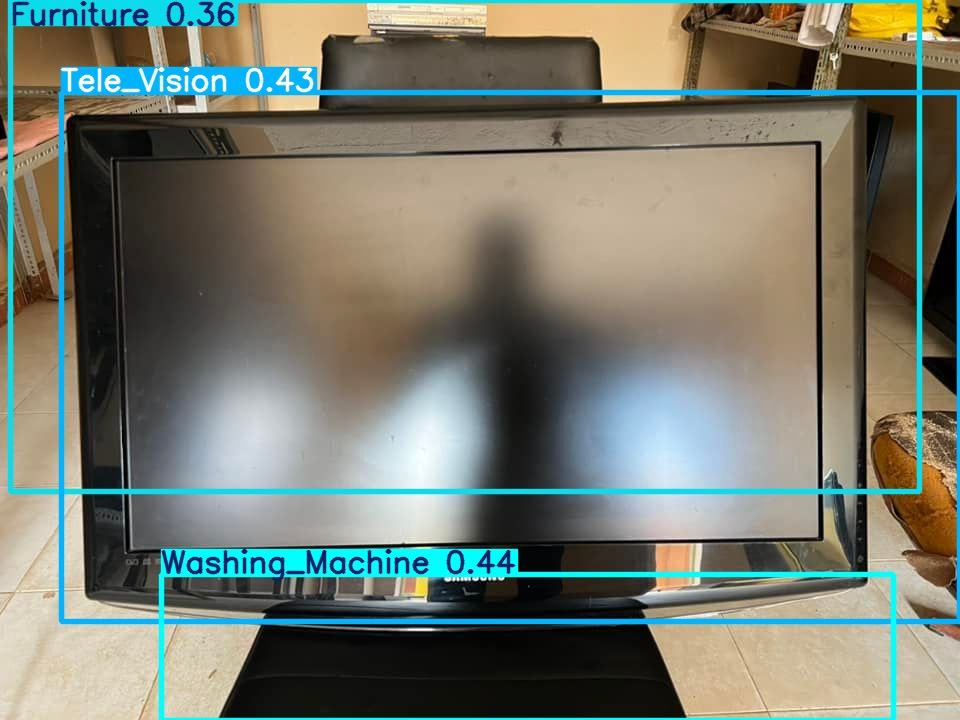

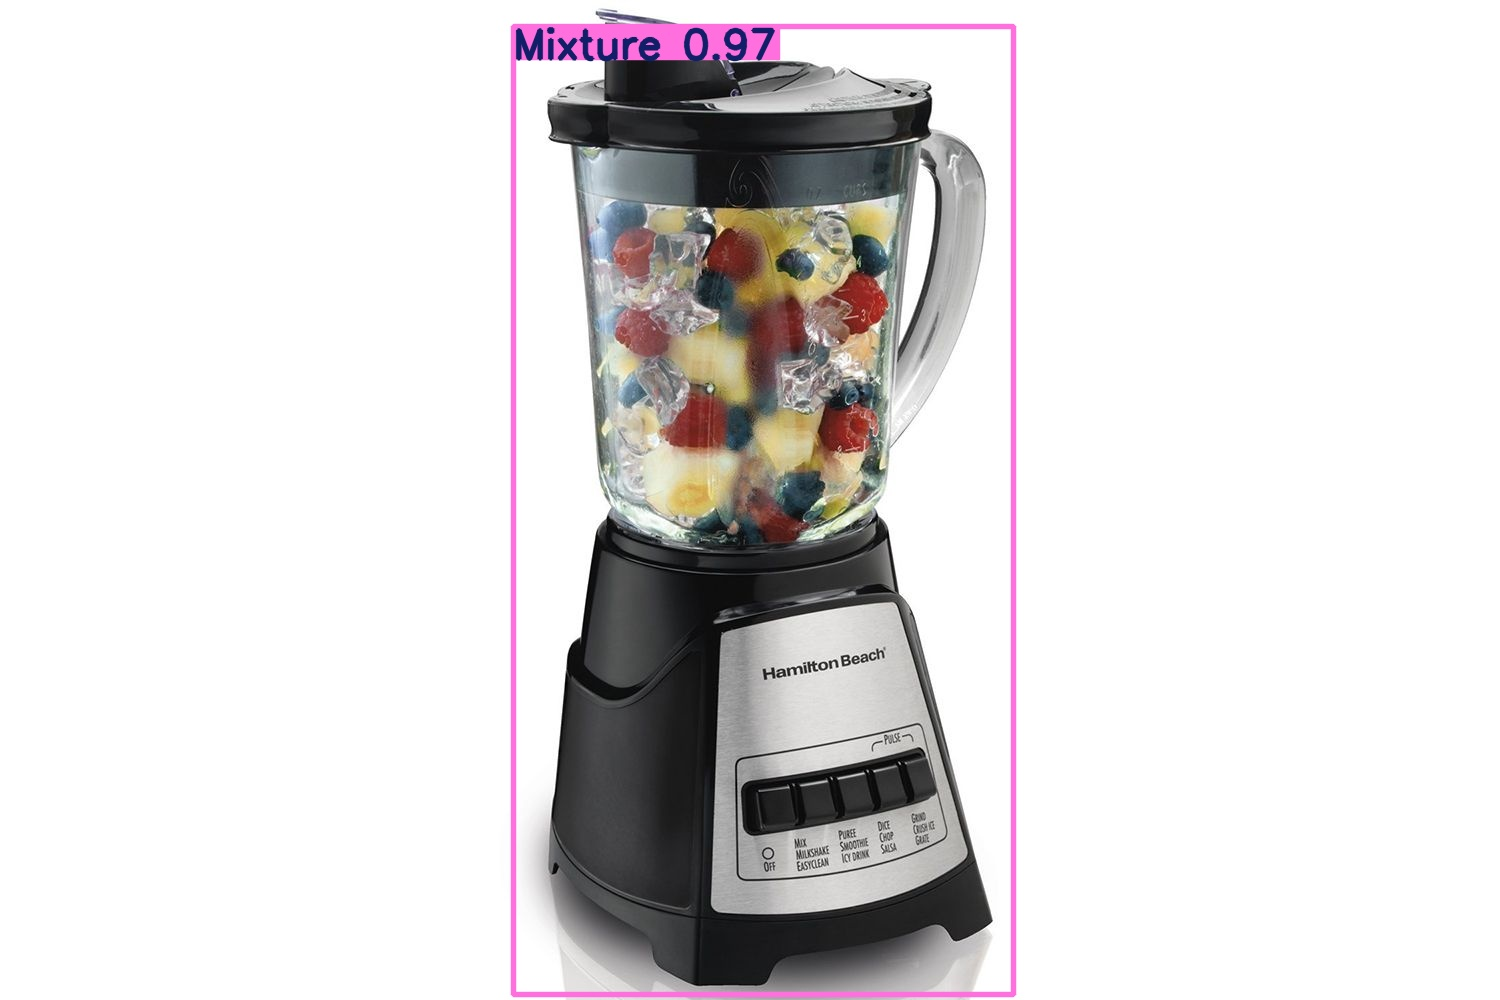

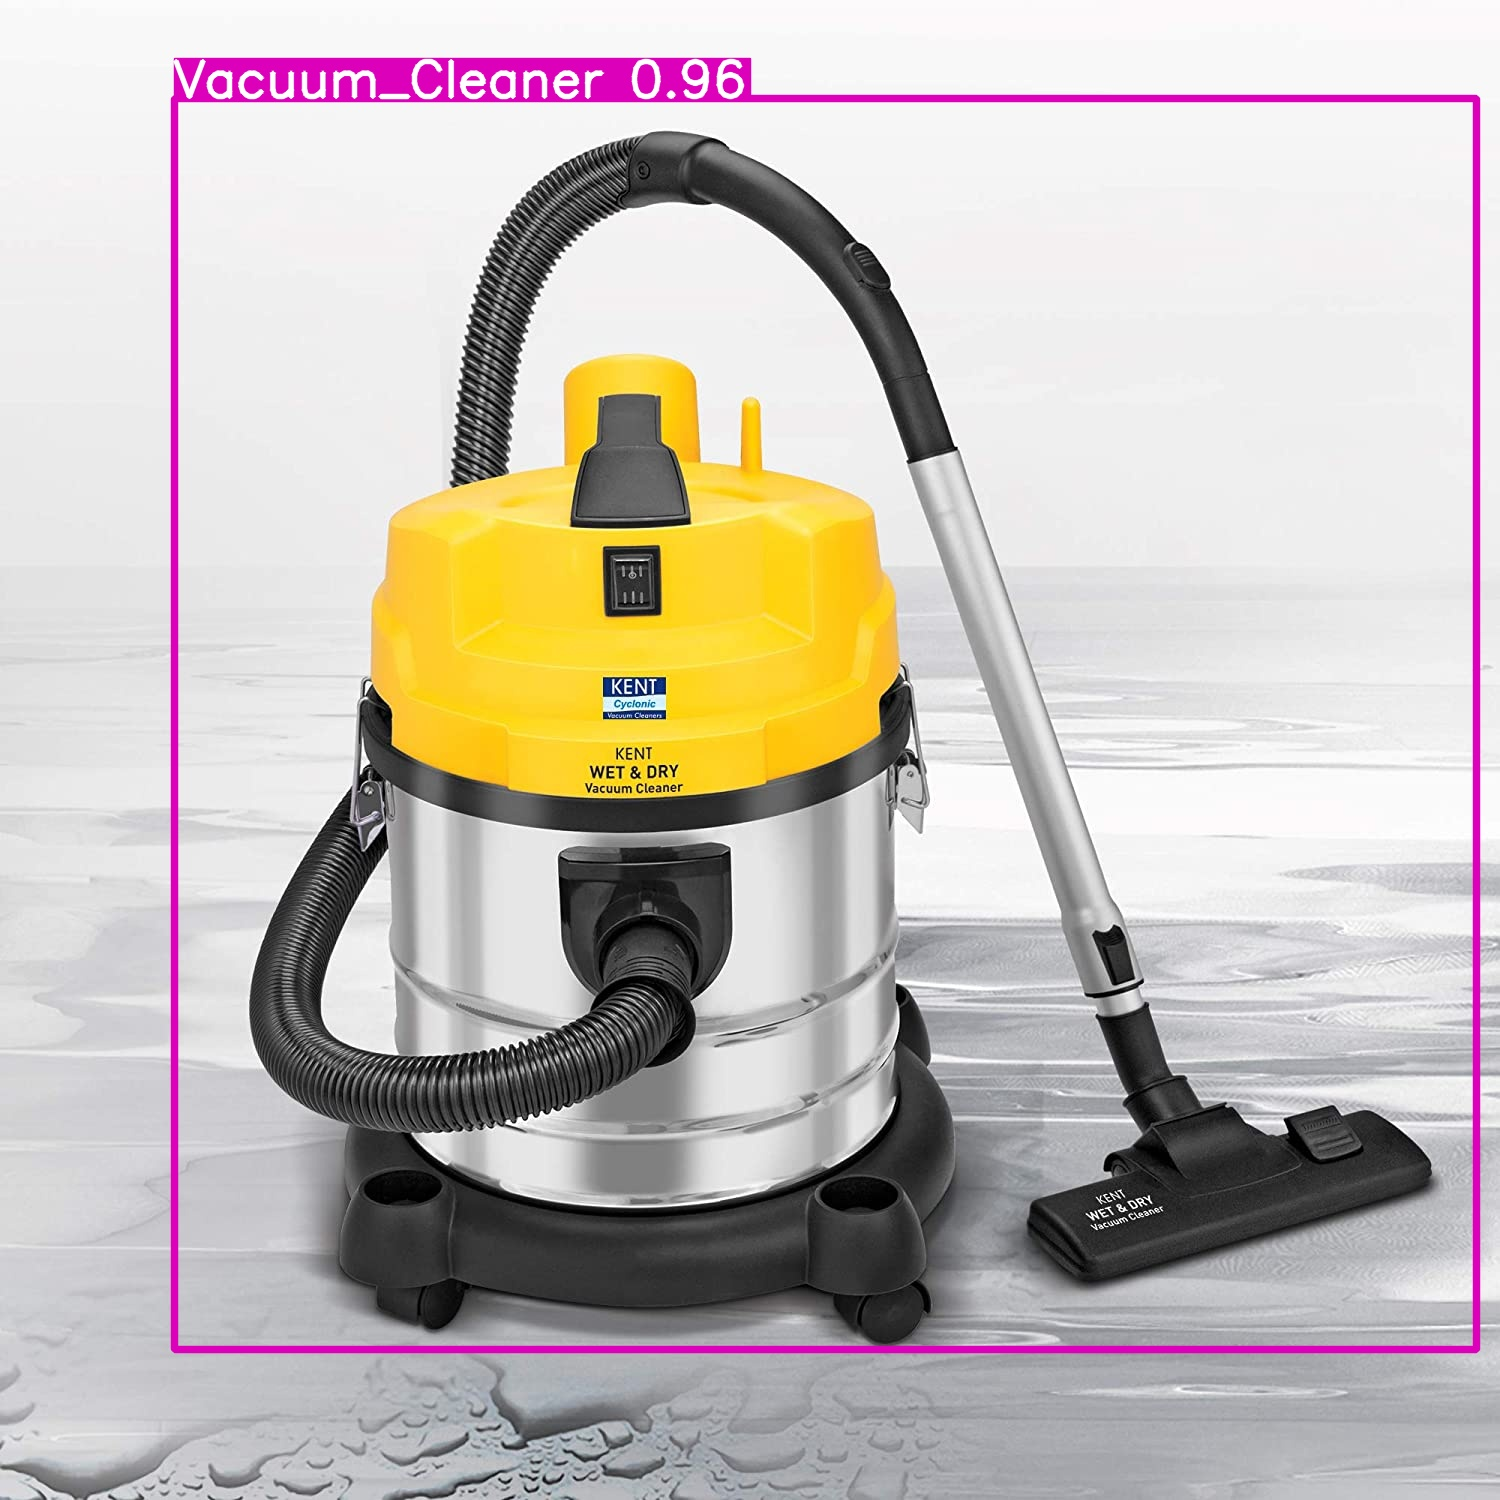

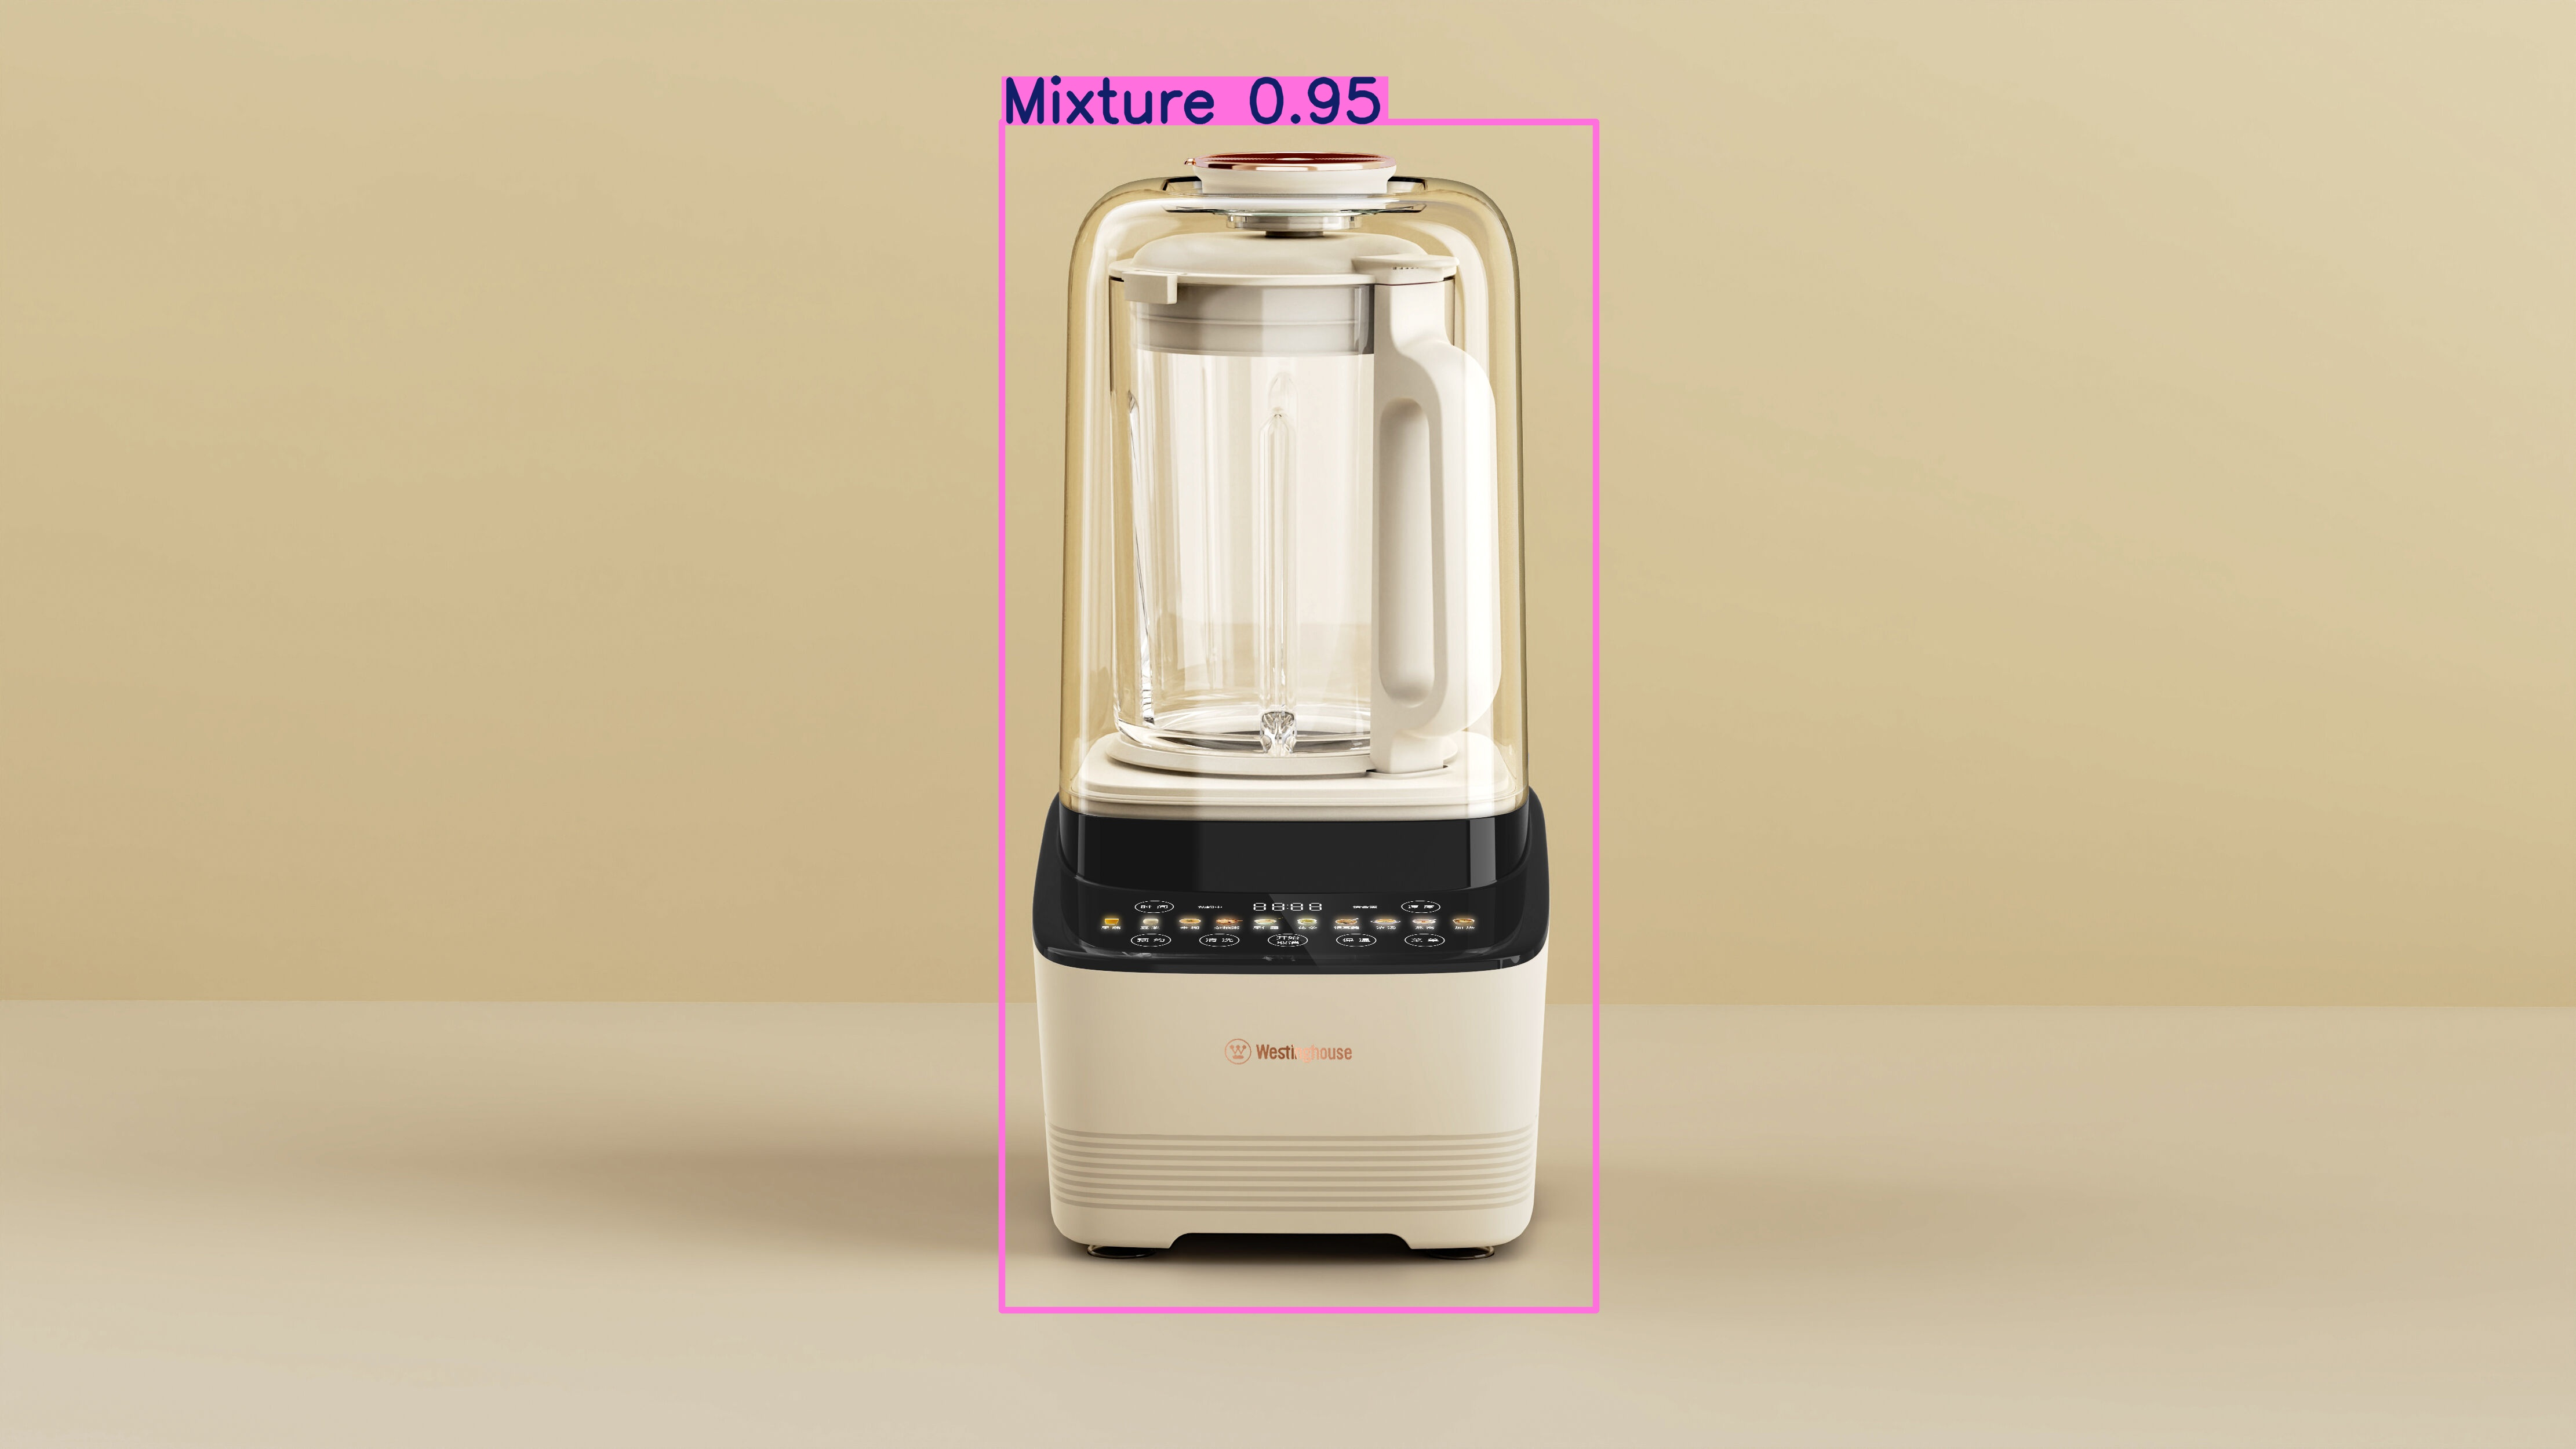

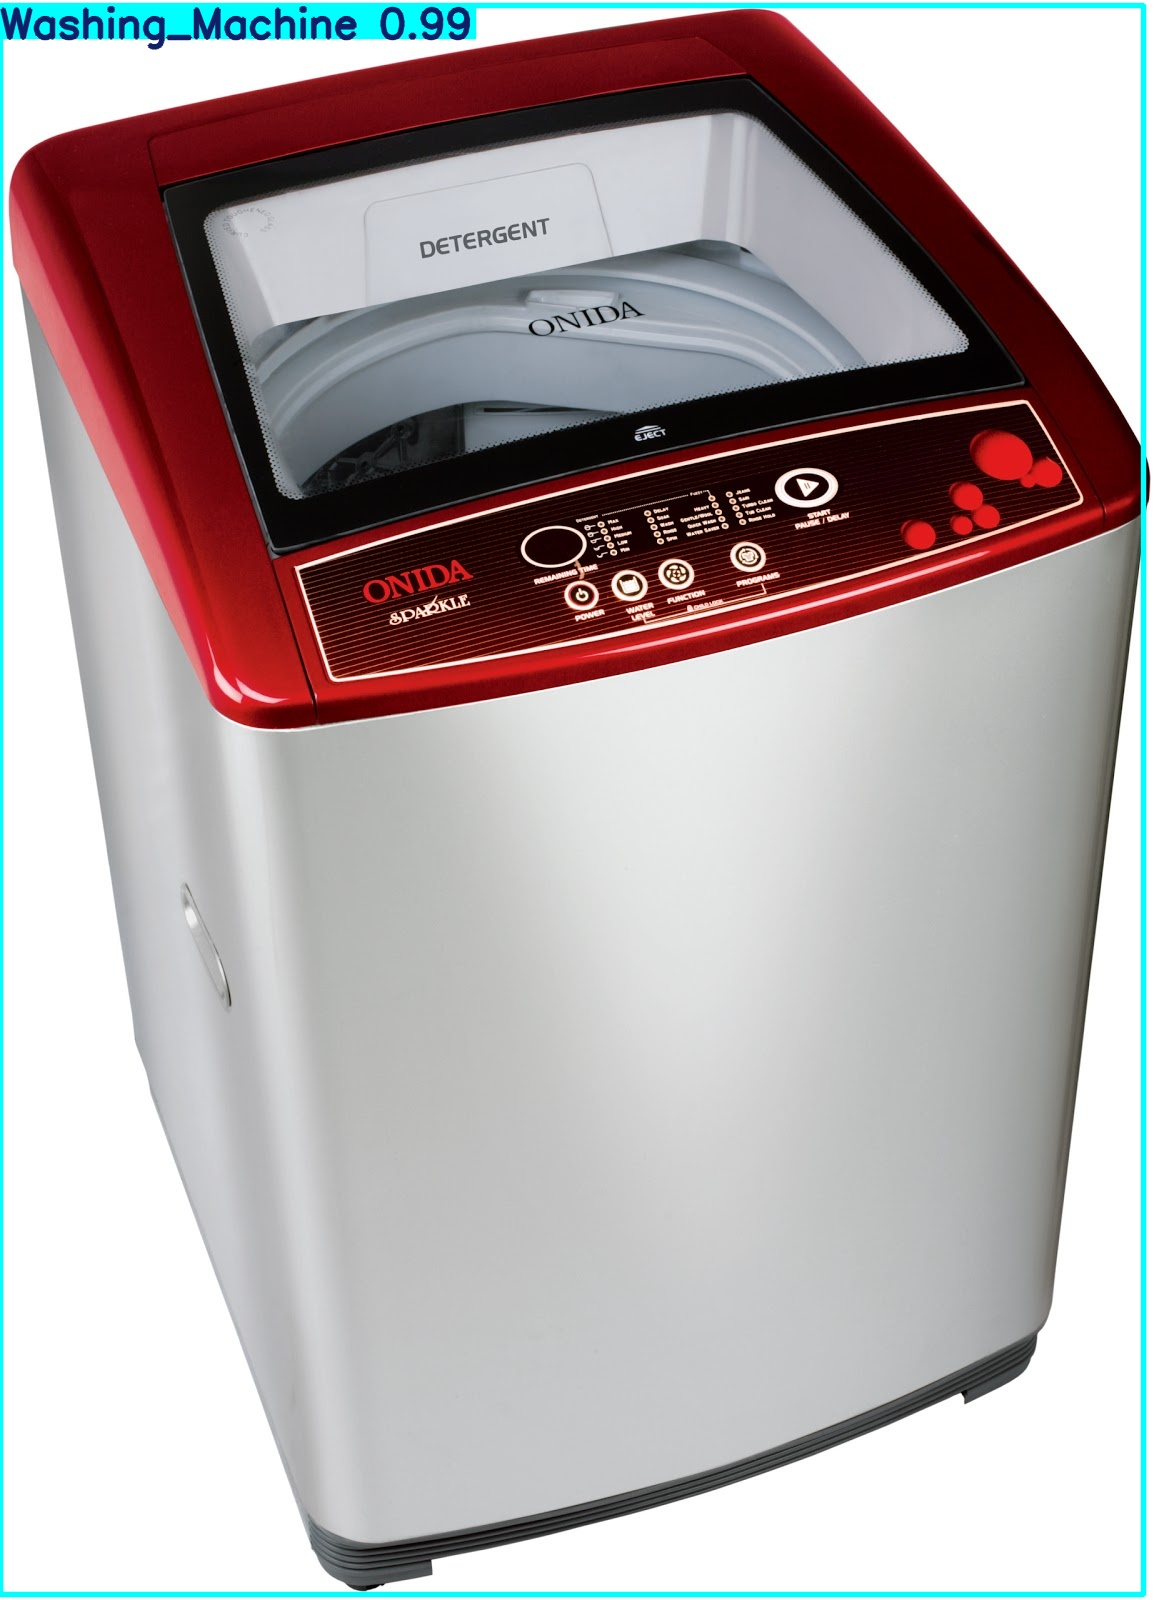

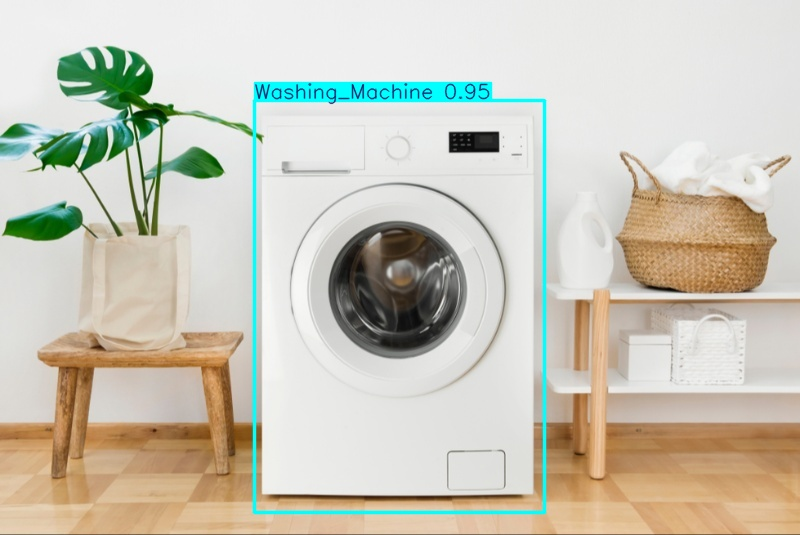

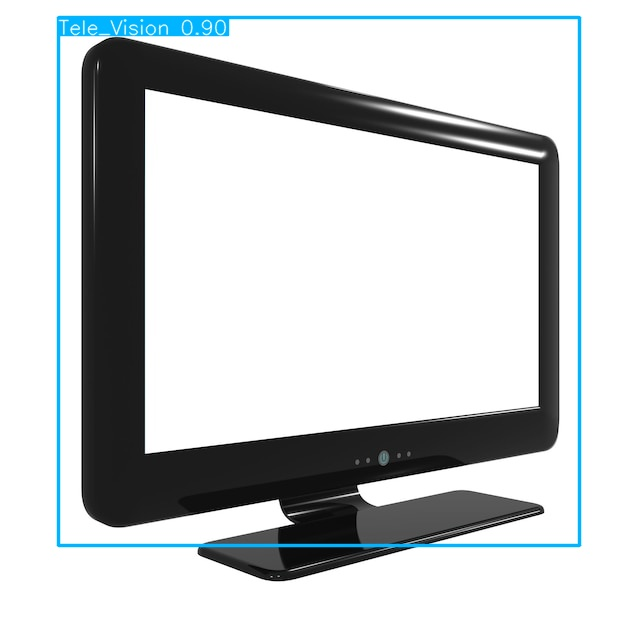

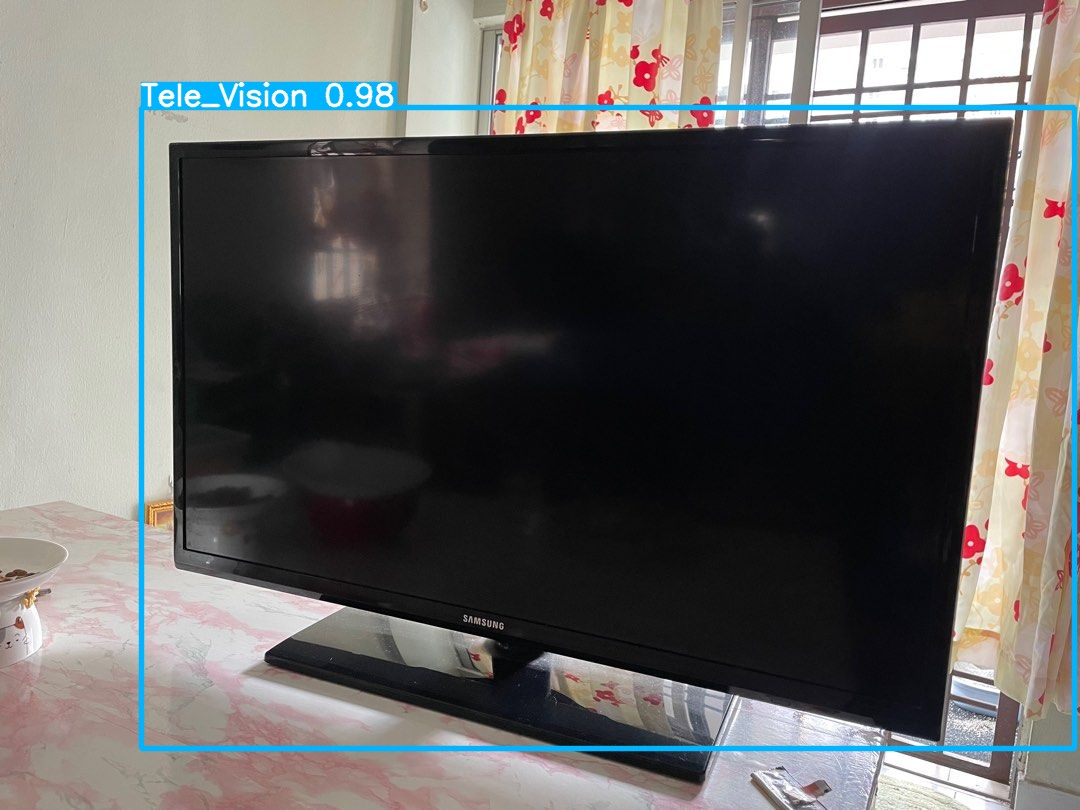

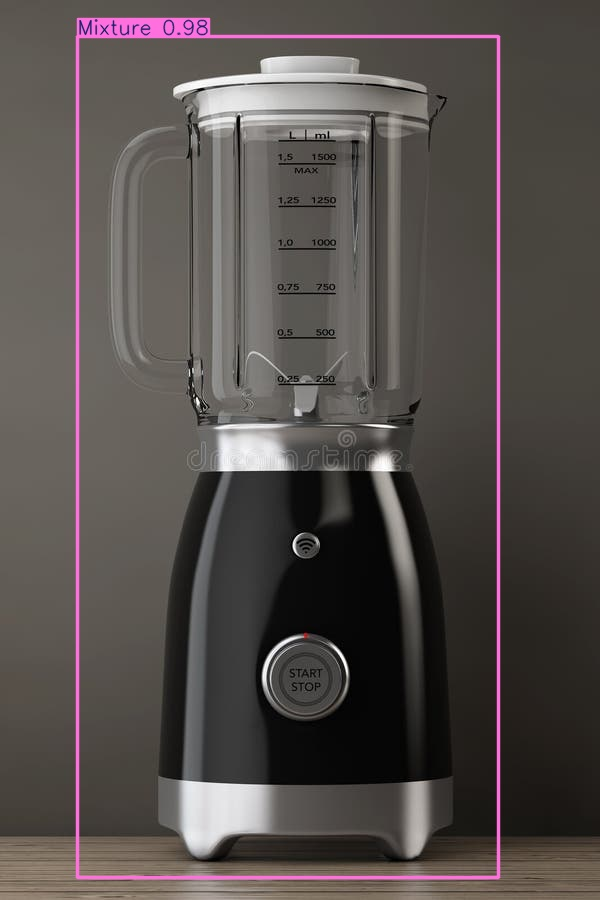

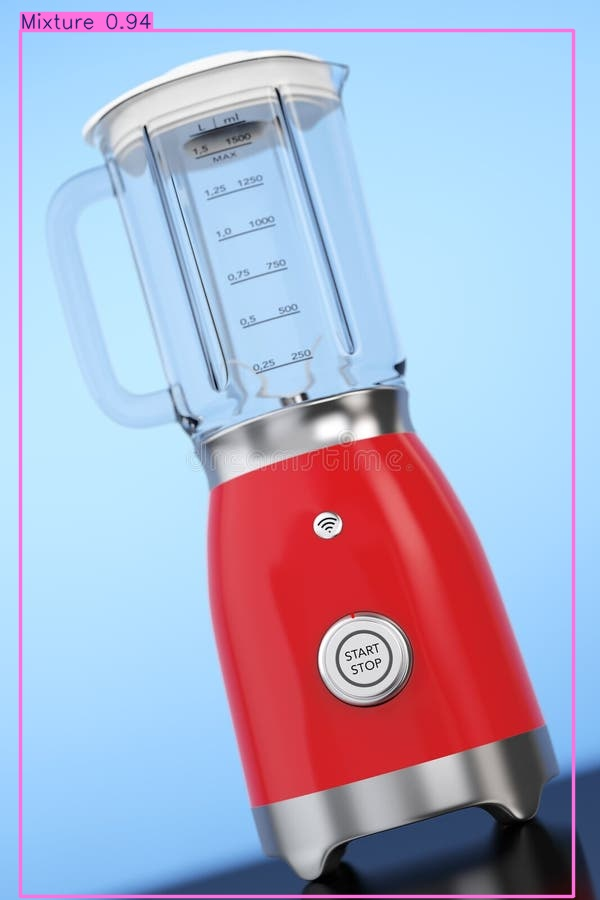

In [4]:
# Get Displayed the Detected Images to Review

import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')

The model should draw a box around each object of interest in each image. If it isn't doing a good job of detecting objects, here are a few tips:

1. Double-check your dataset to make sure there are no labeling errors or conflicting examples.
2. Increase the number of epochs used for training.
3. Use a larger model size (e.g. `yolo11l.pt`).
4. Add more images to the training dataset to capture good training images and improve accuracy.

You can also run the model on video files or other images by uploading them to this notebook and using the above `!yolo detect predict` command, where `source` points to the location of the video file, image, or folder of images. The results will be saved in `runs/detect/predict`.

# 7. Download YOLO Model

01.Zip and download the trained model by running the code blocks below.

02.The code creates a folder named `my_model`, moves the model weights into it, and renames them from `best.pt` to `my_model.pt`.

03.It also adds the training results in case you want to refer them later.

04.It then zips the folder as `my_model.zip`.

In [6]:
# Create "my_model" folder to store model weights and train results

# Step 1: Create "my_model" folder
!mkdir -p /content/Object_Detection/my_model

# Step 2: Copy best.pt weights into my_model folder
!cp /content/runs/detect/train_plastic_yolov8n/weights/best.pt /content/Object_Detection/my_model/my_model.pt

# Step 3: Copy full training logs folder (optional but useful)
!cp -r /content/runs/detect/train_plastic_yolov8n /content/Object_Detection/my_model/

In [7]:
# Zip into "my_model.zip"
%cd /content/Object_Detection

!zip -r my_model.zip my_model

%cd /content

/content/Object_Detection
  adding: my_model/ (stored 0%)
  adding: my_model/my_model.pt (deflated 9%)
  adding: my_model/train_plastic_yolov8n/ (stored 0%)
  adding: my_model/train_plastic_yolov8n/val_batch0_labels.jpg (deflated 18%)
  adding: my_model/train_plastic_yolov8n/confusion_matrix_normalized.png (deflated 16%)
  adding: my_model/train_plastic_yolov8n/val_batch2_labels.jpg (deflated 11%)
  adding: my_model/train_plastic_yolov8n/val_batch1_labels.jpg (deflated 22%)
  adding: my_model/train_plastic_yolov8n/train_batch1801.jpg (deflated 19%)
  adding: my_model/train_plastic_yolov8n/confusion_matrix.png (deflated 20%)
  adding: my_model/train_plastic_yolov8n/BoxR_curve.png (deflated 8%)
  adding: my_model/train_plastic_yolov8n/val_batch0_pred.jpg (deflated 18%)
  adding: my_model/train_plastic_yolov8n/labels.jpg (deflated 24%)
  adding: my_model/train_plastic_yolov8n/BoxF1_curve.png (deflated 5%)
  adding: my_model/train_plastic_yolov8n/train_batch1802.jpg (deflated 20%)
  adding

In [1]:
# We can also download the model from the sidebar
from google.colab import files

files.download('/content/Object_Detection/my_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 8. Deploy YOLO Model on Local Devices

Written a basic Python script, `yolo_detect.py`, that shows how to load a model, run inference on an image source, parse the inference results, and display boxes around each detected class in the image.

### 8.1 Deploy on PC (Windows, Linux, or macOS)

The easiest way to run Ultralytics models on a PC is using Anaconda. Anaconda sets up a virtual Python environment and allows you to easily install Ultralytics and PyTorch. It automatically installs CUDA and cuDNN, which allows you to speed up model inference with your NVIDIA GPU.

**1. Set up virtual environment**

create a new Python environment and activate it:

```
conda create --name yolo-env1 python=3.12 -y
conda activate yolo-env1
```

Install Ultralytics (which also installs import libraries like OpenCV-Python, Numpy, and PyTorch) by issuing the following command:

```
pip install ultralytics
```
**2. Extract downloaded model**
Take the `my_model.zip` file you downloaded in Step 7.1 and unzip it to a folder on your PC. In the Anaconda Prompt terminal, move into the unzipped folder using:

```
cd path/to/folder
```

**3. Download and run yolo_detect.py**

Download the `yolo_detect.py` script into the `my_model`

To run inference with a yolov8s model on a USB camera at 1280x720 resolution, issue:

```
python yolo_detect.py --model D:/Hope-AI/11.Deep_Learning_Module/Object_Detection/my_model/train_plastic_yolov8n/weights/best.pt --source 1 --resolution 1280x720 --record
```

A Window will appear showing a live feed from your webcam with boxes drawn around detected objects in each frame where We can run the model on an video file, image or folder of images.

# Conclusion : We've successfully Trained and Deployed a YOLO object detection model. 😀

# **NOTE : Common Errors**

If you run into any errors working through this notebook, please do the following:

- Double-check that the dataset files are set up in the correct folder structure
- Make sure there are no typos or errors in your labelmap file.